## Cross play matrix for each architecture

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ff = pd.read_csv('xp_ff.csv')
ff = ff.iloc[:,1:].values
idx = np.argsort(ff[:,0])
ff = ff[idx][:,idx]

lstm = pd.read_csv('xp_lstm.csv')
lstm = lstm.iloc[:,1:].values
idx = np.argsort(lstm[:,0])
lstm = lstm[idx][:,idx]

att3 = pd.read_csv('xp_att3.csv')
att3 = att3.iloc[:15,1:16].values
idx = np.argsort(att3[:,0])
att3 = att3[idx][:,idx]

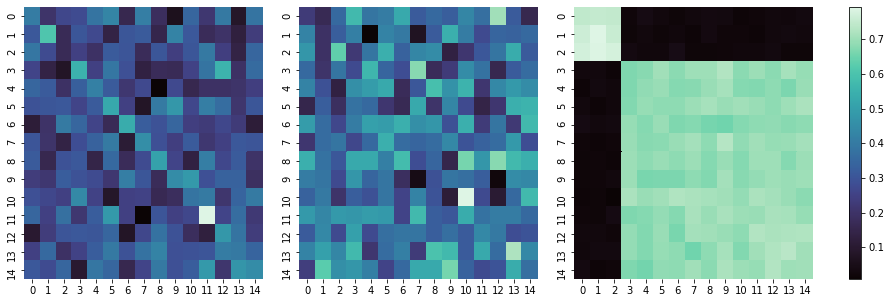

In [46]:
fig, axs = plt.subplots(ncols=4, gridspec_kw=dict(width_ratios=[4,4,4,0.2]), figsize=(15,5))

sns.heatmap(ff, cbar=False, ax=axs[0], cmap="mako")
sns.heatmap(lstm, cbar=False, ax=axs[1], cmap="mako")
sns.heatmap(att3, cbar=False, ax=axs[2], cmap="mako")

fig.colorbar(axs[2].collections[0], cax=axs[3])

plt.show()

In [54]:
def get_table_scores(mat):
    sp_score_mean, sp_score_std = np.mean(np.diag(mat)), np.sqrt(np.var(np.diag(mat)))
    off_diag = np.where(~np.eye(mat.shape[0],dtype=bool))
    xp_score_mean, xp_score_std = np.mean(mat[off_diag]), np.sqrt(np.var(mat[off_diag]))
    return sp_score_mean, sp_score_std, xp_score_mean, xp_score_std

print("Feed forward: ")
print(get_table_scores(ff))
print("LSTM: ")
print(get_table_scores(lstm))
print("Att3: ")
print(get_table_scores(att3))
print("Att3 cluster 1: ")
print(get_table_scores(att3[:3,:3]))
print("Att3 cluster 2: ")
print(get_table_scores(att3[3:,3:]))

Feed forward: 
(0.3584666669368744, 0.021737421651472206, 0.3244047619047619, 0.01606721000295828)
LSTM: 
(0.32180000146230064, 0.020047274077942958, 0.3166428574493953, 0.015126798493871363)
Att3: 
(0.7109333316485087, 0.03570894023871032, 0.4661904783209875, 0.31870244793661207)
Att3 cluster 1: 
(0.7706666588783264, 0.020237463216564593, 0.7641666630903879, 0.013132866859269)
Att3 cluster 2: 
(0.6959999998410543, 0.019403602564900913, 0.6929090944203463, 0.017029142371694526)
